Import the Libraries Successfully - 
Reading of Data - 
   Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  

[2 rows x 38 columns]
Number of rows -  1436
Columns -  Index(['Id', 'Model', 'Price', 'Age_08_04', 

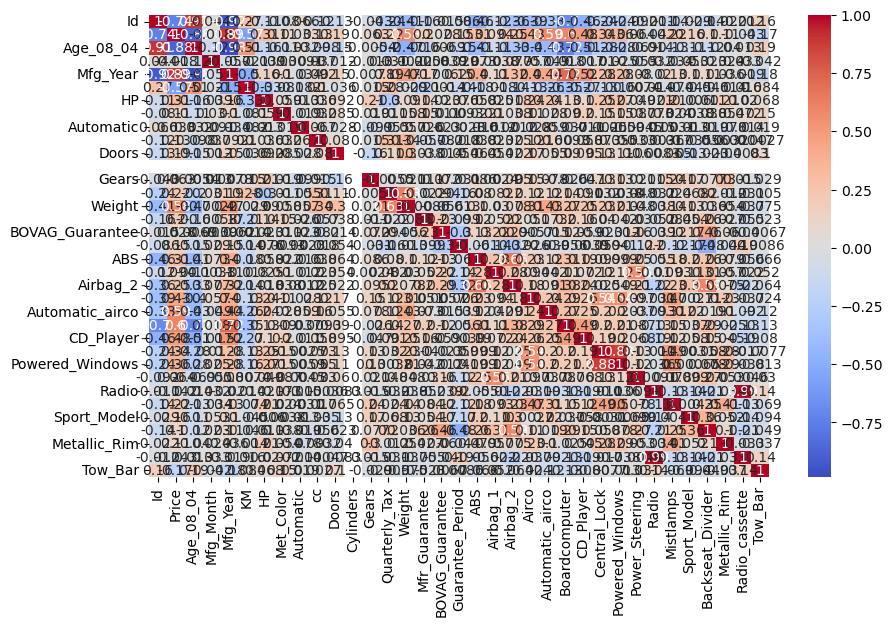

C:\Users\Admin\AppData\Local\Temp\ipykernel_20100\2834101952.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']] = scaler.fit_transform(


Training is done --- 
Score for Training Model -  0.8626054349664558
Predictions 
- [ 9523.40538708 11563.84308972 17511.9133845  26281.4177851
  5556.63324129 12608.49221373  7868.71760728 13393.45508148
 13150.40814442  7800.5543871  10113.17580035  8153.4468559
  6352.38398543  7077.4691295   8837.77157565  7425.60914802
  7745.33274483  6698.00088767 13093.04717196 11425.13674695
  8630.59905361  7411.2053711  20527.52126512  8282.14170327
 13008.65827347 12455.39538583  9036.60589974 10242.38767224
 13175.54608598  6720.39181327  9198.74933399  9750.45265688
  7677.11295062  9938.64610788  4832.0317566  11086.80260528
  9363.45295027  8333.1164589   8267.6548939   6721.06413764
 17378.93319863 15757.17199107 10602.73364246  7853.73811675
  7424.40225745  7312.24917242  9259.28716836 15955.17028436
 10670.70506852  9581.16204275  9134.73146827  7613.28133656
 12245.5983844   7001.68616743  7900.93034069 10235.60141587
  5242.85788781  7492.27239178  8579.44366088 11906.80554828
 10

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

print("Import the Libraries Successfully - ")

# Start the timer
st = time.time()

# Reading the data
print("Reading of Data - ")
def read_data(file_path):
    try:
        data = pd.read_csv(file_path, encoding="ISO-8859-1")  # Encoding specified to handle special characters
        print(data.head(2))
        return data
    except Exception as e:
        print("Error in Read Data Function - ", e)

# Call the function
data = read_data("G:/TOP-MENTOR/File/August 11th/Project - 3&4_Multiple_Reg/ToyotaCorolla.csv")

# Data Profiling
def data_profile(data):
    try:
        records = len(data)
        columns = data.columns
        missing = data.isnull().sum()
        data_types = data.dtypes
        stats = data.describe()

        print("Number of rows - ", records)
        print("Columns - ", columns)  
        print("Missing\n", missing)
        print(data_types)  
        print(stats)
    except Exception as e:
        print("Error in Data Profile - ", e)

# Calling the function
data_profile(data)

# Exploratory Data Analysis
def exploratory_analysis(data):
    try:
        sns.pairplot(data)
        plt.show()
        corr = data.corr(numeric_only=True)
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.show()
    except Exception as e:
        print("Error in exploratory_analysis", e)

# Run exploratory analysis
exploratory_analysis(data)

# Data Preprocessing
def data_preprocessing(data):
    try:
        # Selecting relevant columns
        relevant_columns = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']
        data = data[relevant_columns]

        # Feature scaling
        scaler = StandardScaler()
        data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']] = scaler.fit_transform(
            data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
        )

        # Splitting data into X and y
        X = data.drop('Price', axis=1)
        y = data['Price']

        # Splitting the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)
        return X_train, X_test, y_train, y_test
    except Exception as e:
        print('Error in Data Preprocessing - ', e)

X_train, X_test, y_train, y_test = data_preprocessing(data)

# Data Modeling
def modelling(X_train, y_train):
    try:
        model = LinearRegression()
        model.fit(X_train, y_train)
        print("Training is done --- ")
        coeff = model.coef_
        constant = model.intercept_
        score = model.score(X_train, y_train)
        print("Score for Training Model - ", score)
        return model, coeff, constant
    except Exception as e:
        print("Error in Model Training - ", e)

model, coeff, constant = modelling(X_train, y_train)

# Model Evaluation
def model_evaluation(model, X_test, y_test):
    try:
        predict = model.predict(X_test)
        final_score  = r2_score(y_test, predict)
        return predict, final_score
    except Exception as e:
        print("Error in Model Evaluation - ", e)

predict, final_score = model_evaluation(model, X_test, y_test)
print("Predictions \n-", predict)
print('Final Score - ', final_score)

# End the timer
en = time.time()

print("The total time taken in seconds - ", (en - st))
